In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(614, 13)

In [5]:
#checking data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Dataset contains 1 int64, 4 float and 8 object type.

In [7]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Null values are present in almost all columns

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Summary Statistics:

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Analyzing Dependent Variable:

In [10]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

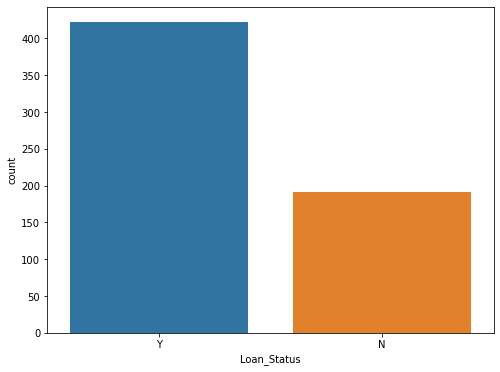

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(df['Loan_Status'])
plt.show()

#### Analyzing Independent Variable

In [12]:
df.dtypes[df.dtypes == 'object']

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [13]:
df.dtypes[df.dtypes == 'int64']

ApplicantIncome    int64
dtype: object

In [14]:
df.dtypes[df.dtypes == 'float']

CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Processing

#### fill missing values

In [16]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [17]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [18]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [19]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [20]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [21]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0],inplace=True)

In [22]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### filling Missing values with mean for continuous variable

In [24]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean(), inplace=True)
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace=True)

##### filling Missing values with mean for continuous variable

In [25]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [141]:
#droping Loan_id column
df=df.drop(columns=['Loan_ID'])

In [142]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,360.0,1,2,1
1,1,1,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.008621,360.0,1,0,0
2,1,1,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,360.0,1,2,1
3,1,1,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.145633,360.0,1,2,1
4,1,0,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.245833,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,360.0,1,0,1
610,1,1,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,180.0,1,0,1
611,1,1,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845431,360.0,1,2,1
612,1,1,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.981439,360.0,1,2,1


# Data Visualization:

In [27]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

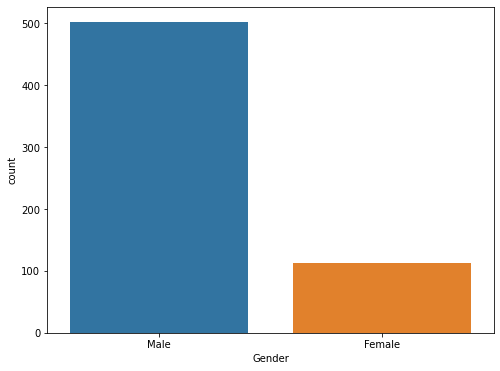

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.show()

In [30]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

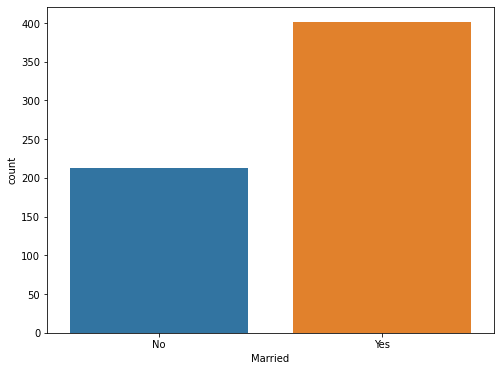

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(df['Married'])
plt.show()

#### Married person gets maximum loan approved

In [33]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [34]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

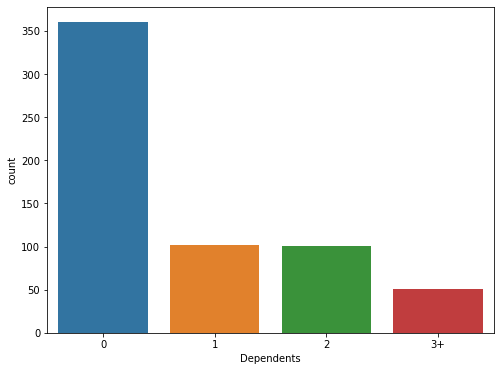

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'])
plt.show()

In [36]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [37]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

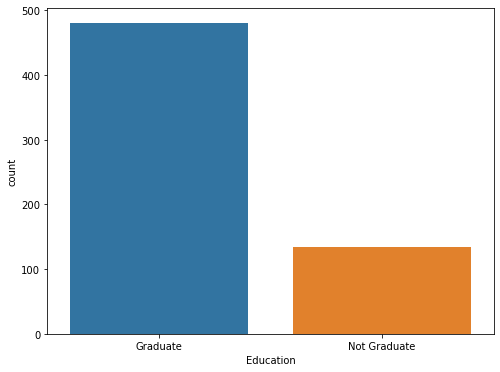

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(df['Education'])
plt.show()

### Graduate person more likely to get loan approved.

In [39]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

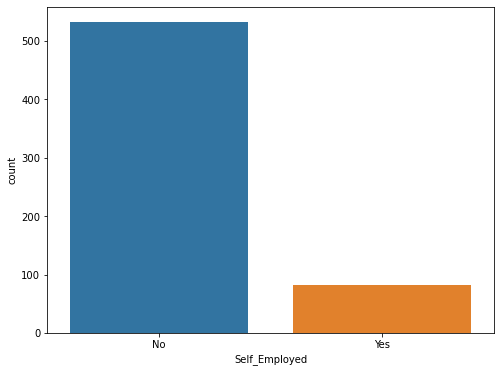

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(df['Self_Employed'])
plt.show()

In [42]:
df['Credit_History'].unique()

array([1., 0.])

In [43]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

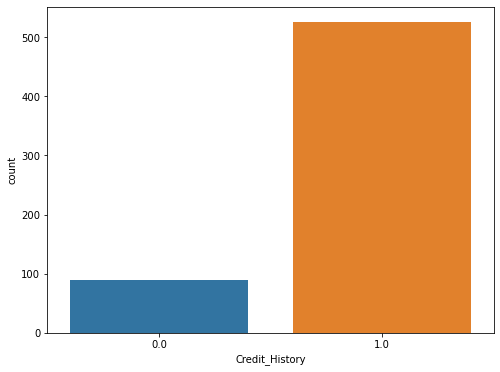

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(df['Credit_History'])
plt.show()

In [45]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [46]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

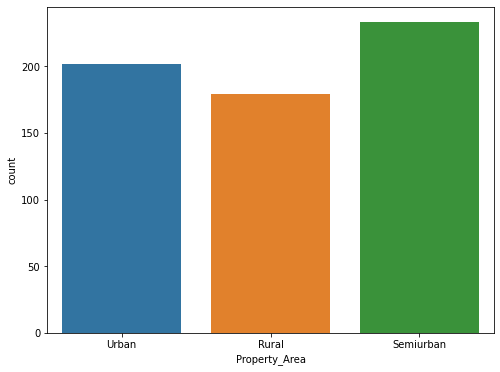

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(df['Property_Area'])
plt.show()

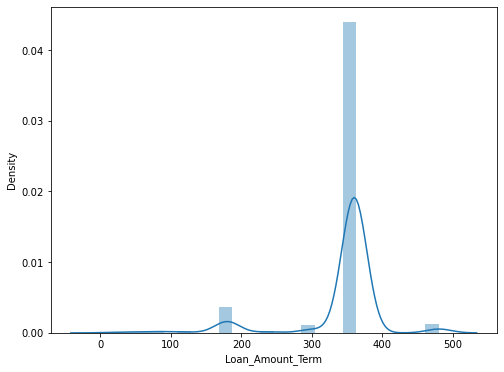

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(df['Loan_Amount_Term'])
plt.show()

### Data is not normally distributed

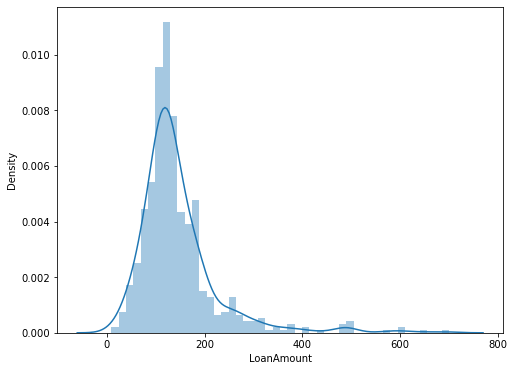

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(df['LoanAmount'])
plt.show()

In [52]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


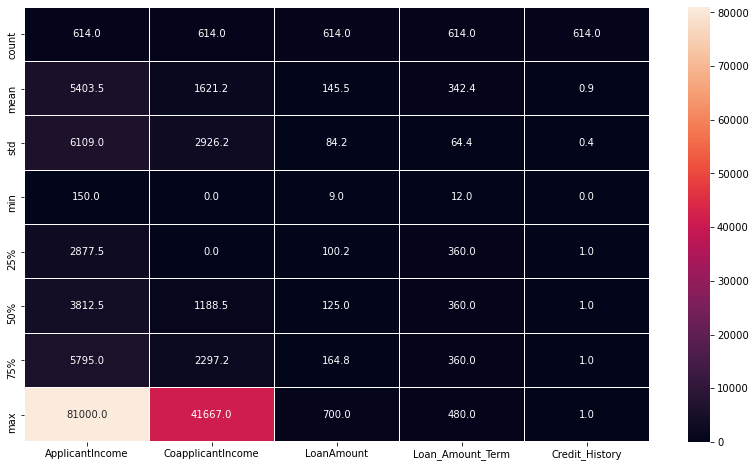

In [53]:
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Label Encoding:

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

#### Convert all non-numeric values to number

In [60]:
num = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for i in num:
    df[i]=le.fit_transform(df[i].astype('str'))

In [61]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
dtype: object

# Correlation:

In [62]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556


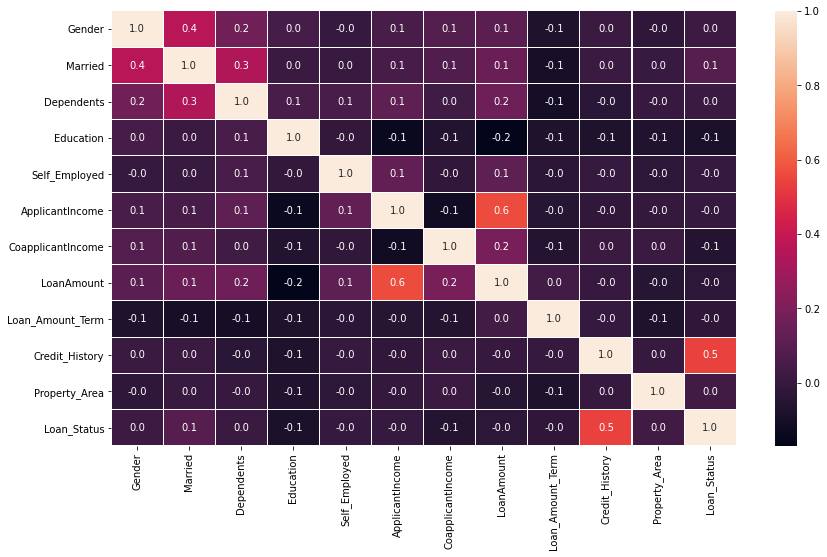

In [63]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# 'Loan_Status' vs Numerical Data Columns

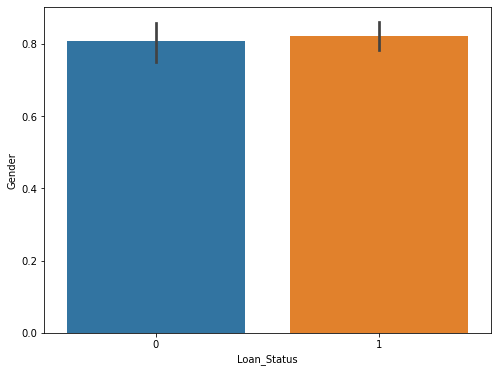

In [65]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Gender", data=df)
plt.show()

### for male - 1
### for female - 0

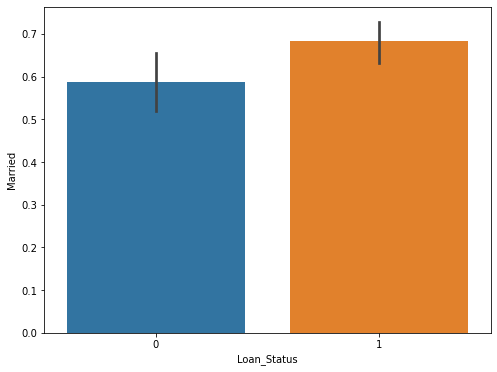

In [66]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Married", data=df)
plt.show()

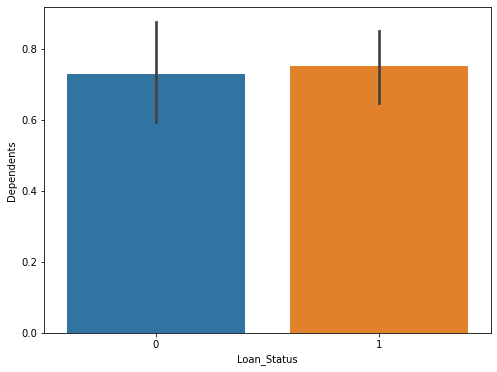

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Dependents", data=df)
plt.show()

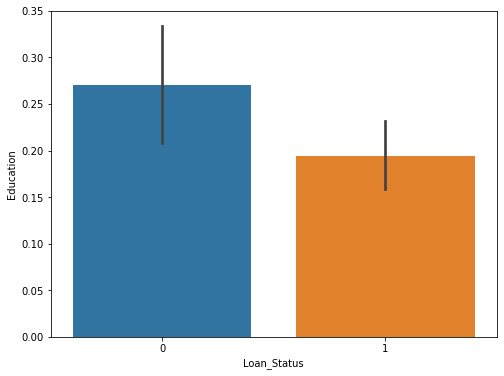

In [68]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Education", data=df)
plt.show()

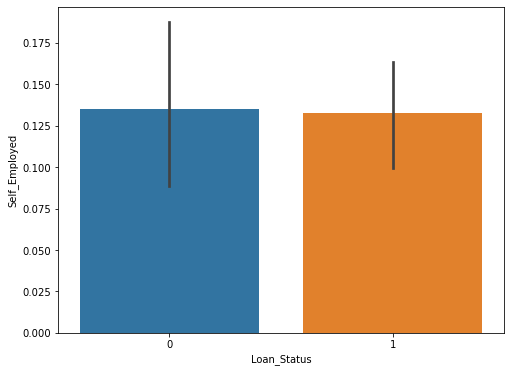

In [69]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Self_Employed", data=df)
plt.show()

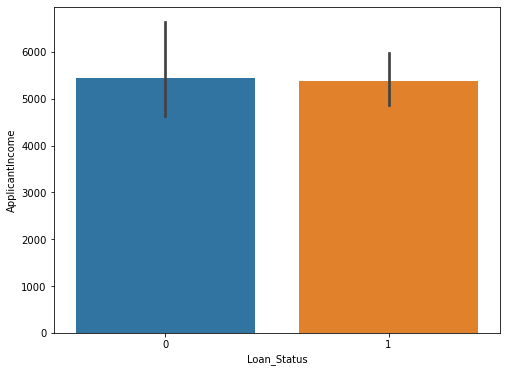

In [70]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.show()

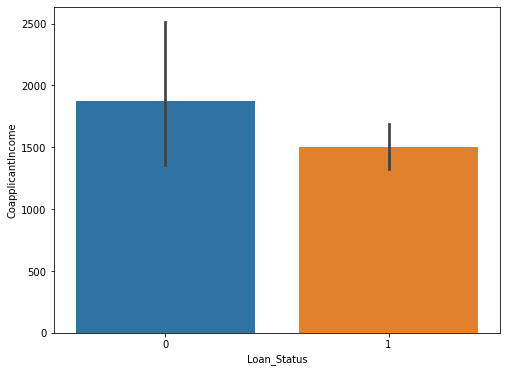

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="CoapplicantIncome", data=df)
plt.show()

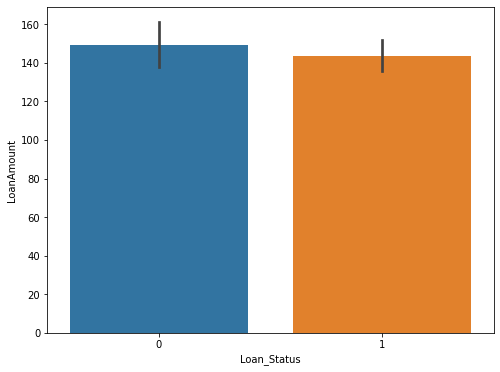

In [72]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="LoanAmount", data=df)
plt.show()

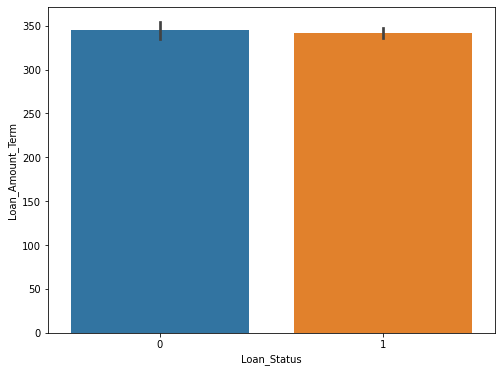

In [73]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Loan_Amount_Term", data=df)
plt.show()

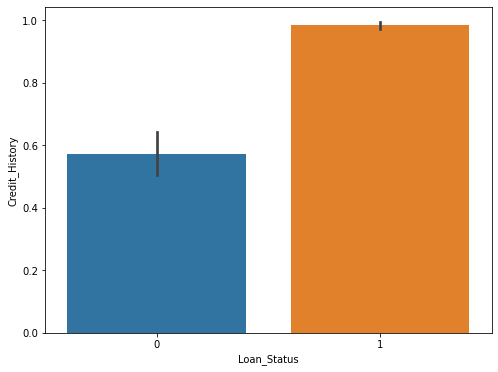

In [74]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Credit_History", data=df)
plt.show()

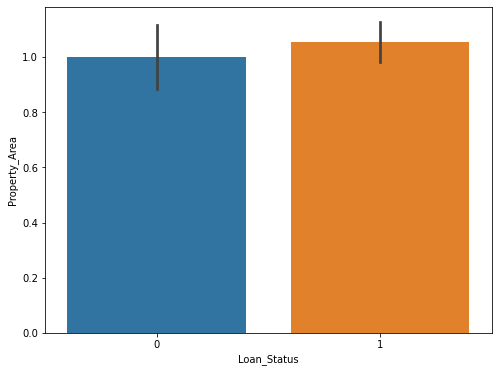

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x="Loan_Status", y="Property_Area", data=df)
plt.show()

# Checking For Outliers:

In [77]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

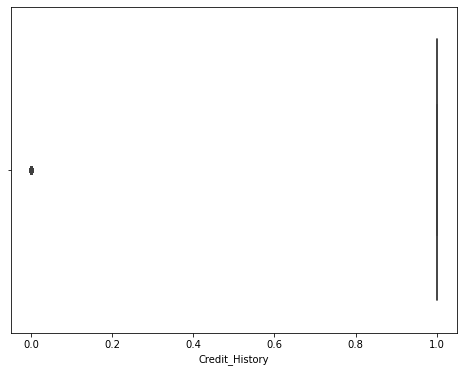

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Credit_History'])
plt.show()

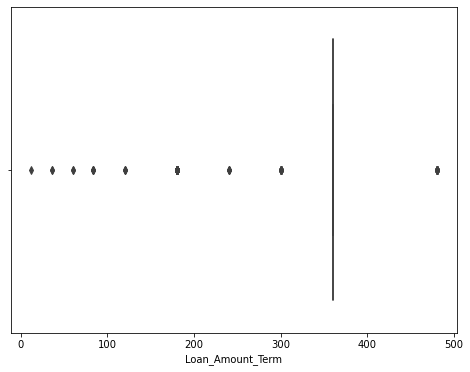

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Loan_Amount_Term'])
plt.show()

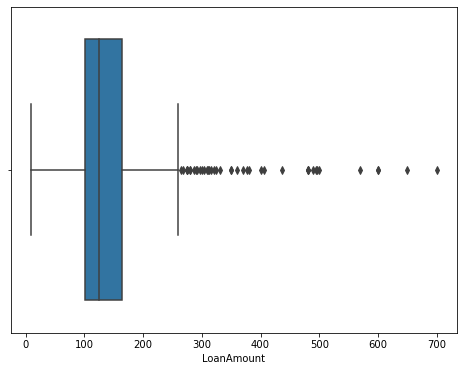

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(df['LoanAmount'])
plt.show()

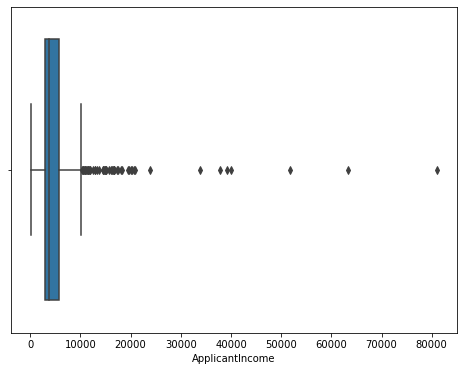

In [83]:
plt.figure(figsize=(8,6))
sns.boxplot(df['ApplicantIncome'])
plt.show()

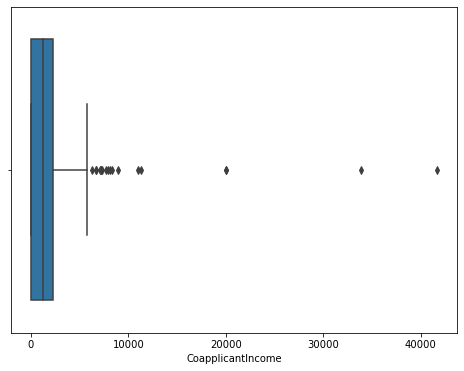

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(df['CoapplicantIncome'])
plt.show()

### Above columns have a lot of outliers.

### Removing Outliers uding Zscore method:

In [86]:
from scipy.stats import zscore

In [87]:
df1 = X[['Credit_History','Loan_Amount_Term','LoanAmount','ApplicantIncome','CoapplicantIncome']].copy()

In [88]:
z = zscore(df1)

In [89]:
z_abs_score = np.abs(z)

In [90]:
#taking thresold as 3
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [91]:
df2.shape

(577, 5)

In [92]:
df1.shape

(614, 5)

# Percentage of Dataloss:

In [94]:
data_loss = (614-577)/614*100
data_loss

6.026058631921824

### 6.02 % data loss is acceptable

In [95]:
#dropping outlier from original data
dropindx = X.index.difference(df2.index)

In [96]:
df.drop(dropindx,inplace = True)

In [97]:
df.shape

(577, 13)

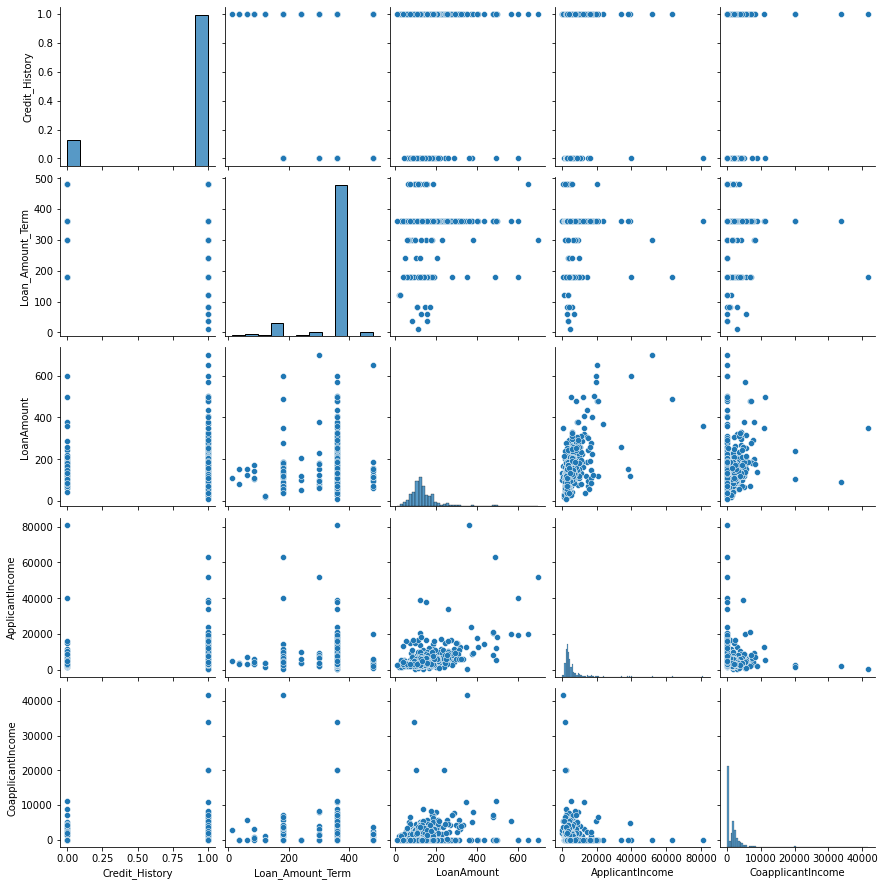

In [102]:
#plotting pairplot
sns.pairplot(df1)

# Skewness:

In [105]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.163426
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Removing Skewness using yeo-johnson method:

In [143]:
skewed = X[['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [144]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [145]:
trans = scaler.fit_transform(skwd)

In [146]:
data_trans = pd.DataFrame(trans, columns=skewed.columns)

In [147]:
data_trans.skew()

Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047768
dtype: float64

In [148]:
data_trans.index = df.index

In [149]:
df[['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount']] = data_trans[['Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount']]

In [150]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,-0.145633,360.0,1,2,1
1,1,1,0.902869,-0.541961,-0.380580,0.234783,0.744117,0.008621,360.0,1,0,0
2,1,1,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.432788,360.0,1,2,1
3,1,1,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.145633,360.0,1,2,1
4,1,0,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.245833,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.288499,360.0,1,0,1
610,1,1,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.335137,180.0,1,0,1
611,1,1,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.845431,360.0,1,2,1
612,1,1,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.981439,360.0,1,2,1


# Scaling:

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
X = df.drop(columns = ['Loan_Status'])
y = df['Loan_Status']

In [154]:
scaler= StandardScaler()
X_ss = scaler.fit_transform(X)

# Principle Component Analysis:

In [155]:
from sklearn.decomposition import PCA

In [156]:
PA = PCA()

In [159]:
pca_df = PA.fit_transform(X_ss)

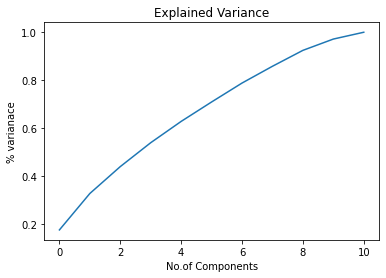

In [160]:
#visualzise
plt.figure()
plt.plot(np.cumsum(PA.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

# Model Building:

In [161]:
 from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [162]:
X_train,X_test,y_train,y_test = train_test_split(X_ss,y,test_size=.2,random_state=42)

## Decision tree classifier

In [164]:
dtc =  DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [166]:
dtc.score(X_train,y_train)

1.0

In [167]:
pred_dtc = dtc.predict(X_test)

In [168]:
print(accuracy_score(y_test,pred_dtc))

0.7155172413793104


### The accuracy of Decision Tree Classifier is 71.55%

## RandomForestClassifier:

In [171]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
rf.score(X_train,y_train)

1.0

In [173]:
pred_rf = rf.predict(X_test)

In [174]:
print(accuracy_score(y_test,pred_rf))

0.8362068965517241


### The accuracy of RandomForestClassifier is 83.62%

## LogisticRegression

In [176]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [177]:
lr.score(X_train,y_train)

0.8156182212581344

In [178]:
pred_lr = lr.predict(X_test)

In [179]:
print(accuracy_score(y_test,pred_lr))

0.8275862068965517


### The accuracy of LogisticRegression is 82.75%

## KNeighborsClassifier:

In [185]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [186]:
knn.score(X_train,y_train)

0.8177874186550976

In [187]:
pred_knn = knn.predict(X_test)

In [189]:
print(accuracy_score(pred_knn,y_test))

0.8275862068965517


# Cross Validation:

In [190]:
cvs = cross_val_score

In [192]:
#Decisiontreeclassifier
print(cross_val_score(dtc,X,y,cv=5).mean())

0.7227886056971514


In [193]:
#RandomForestclassifier
print(cross_val_score(rf,X,y,cv=5).mean())

0.7903298350824588


In [194]:
#logistic regression
print(cross_val_score(lr,X,y,cv=5).mean())

0.8180809595202397


In [195]:
#KNeighborsClassifier
print(cross_val_score(knn,X,y,cv=5).mean())

0.7001649175412294


# Hyper Parameter Tunning:

### RandomForestClassifier:

In [220]:
parameters = {'max_depth':[6,7,8],'max_features':['auto','sqrt'],'n_estimators':[200,300],'criterion' :['gini','entropy']}

In [221]:
RFC = RandomForestClassifier()

In [222]:
RF_cv = GridSearchCV(RFC, parameters, cv=5)

In [223]:
RF_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [224]:
RF_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 300}

In [201]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)
pred_rf = model_RFC.predict(X_test)
acc = accuracy_score(y_test,pred_rf)
print(acc*100)

82.75862068965517


# AUC ROC Curve:

In [225]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

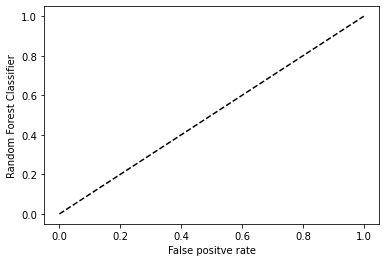

In [230]:
plt.plot([0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positve rate')
plt.ylabel('Random Forest Classifier')
plt.show()

In [231]:
loan_model = RandomForestClassifier()
loan_model.fit(X_train,y_train)
pred_rf = loan_model.predict(X_test)
print(accuracy_score(y_test,pred_rf))

0.8448275862068966


# RandomForestClassifier 84.48%

# Saving model

In [232]:
import joblib

In [233]:
joblib.dump(loan_model,'LoanApplication.pkl')

['LoanApplication.pkl']

# !!!!! THANK YOU !!!!!